# Clasificación con SKLearn

#Introduccion a la clasificacion

In [2]:
#Features 1=True, 0=False
# Pelo largo?
# Uñas afiladas?
# Hace miau?
# Target 1=Perro, 0=Gato
perro1 = [0,1,0]
perro2 = [0,1,1]
perro3 = [1,1,1]


gato1 = [0,1,1]
gato2 = [0,1,0]
gato3 = [1,1,0]

x_train = [perro1, perro2, perro3, gato1, gato2, gato3]
y_train = [1,1,1,0,0,0] 

In [3]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(x_train,y_train)


LinearSVC()

In [4]:
# Prueba del modelo
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([1])

In [5]:
misterio1 = [1,0,1]
misterio2 = [1,1,0]
misterio3 = [0,0,1]
x_test = [misterio1, misterio2, misterio3]
y_test = [0,1,1]

previsiones = model.predict(x_test)

In [6]:
correctos = (previsiones==y_test).sum()
total = len(x_test)
tasa_aciertos = correctos/total
print(f'La tasa de aciertos fue del {round(tasa_aciertos*100,2)}%')

La tasa de aciertos fue del 33.33%


In [7]:
from sklearn.metrics import accuracy_score

tasa_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue del {round(tasa_aciertos*100,2)}%')

La tasa de aciertos fue del 33.33%


# Pruebas replicables, estratificacion, lectura de datos de internet

In [8]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/ahcamachod/38673f75b54ec62ffc290eff8e7c716e/raw/6eaa07e199d9f668bf94a034cb84dac58c82fa4f/tracking.csv'
data = pd.read_csv(uri)
data.sample(5)

,home,how_it_works,contact,bought
92,1,1,0,0
29,0,0,1,0
23,0,1,0,0
31,1,0,1,1
63,0,1,0,0


In [9]:
mapa = {
      "home" : "pagina_principal",
      "how_it_works" : "como_funciona",
      "contact" : "contacto",
      "bought" : "compro"
        }

In [10]:
data.rename(columns=mapa, inplace=True)
data.head(5)

,pagina_principal,como_funciona,contacto,compro
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [11]:
x = data[['pagina_principal','como_funciona','contacto']]
y = data.compro
x


,pagina_principal,como_funciona,contacto
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
94,0,0,1
95,1,1,1
96,0,0,1
97,0,1,0


In [12]:
data.shape


(99, 4)

In [13]:
x_train = x[:75]
y_train = y[:75]
x_test = x[75:]
y_test = y[75:]

In [14]:
model = LinearSVC()
model.fit(x_train,y_train)
predicciones = model.predict(x_test)
tasa_acierto = accuracy_score(y_test, predicciones)
print(f'La tasa de aciertos fue del {round(tasa_acierto*100,2)}%')

La tasa de aciertos fue del 95.83%


In [15]:
from sklearn.model_selection import train_test_split

SEED = 43

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=SEED, stratify=y)
model = LinearSVC()
model.fit(x_train,y_train)
predicciones = model.predict(x_test)
tasa_acierto = accuracy_score(y_test, predicciones)
print(f'La tasa de aciertos fue del {round(tasa_acierto*100,2)}%')

La tasa de aciertos fue del 100.0%


In [16]:
y_train.value_counts()

0    49
1    25
Name: compro, dtype: int64

In [17]:
25/74

0.33783783783783783

In [18]:
y_test.value_counts()

0    17
1     8
Name: compro, dtype: int64

In [19]:
8/25

0.32

#Proyecto de baja dimensionalidad y Bseline

In [20]:
uri = 'https://gist.githubusercontent.com/ahcamachod/7c55640f0d65bcbd31bb986bb599180c/raw/1b616e97a8719b3ff245fcdd68eaebdb8da38082/projects.csv'

data = pd.read_csv(uri)

In [21]:
mapa ={
          "unfinished" : "finalizado",
          "price" : "precio",
          "expected_hours" : "horas_estimadas"
      }
cambio = {1 : 0, 0 : 1}

data = data.rename(columns=mapa)
data["finalizado"] = data.finalizado.map(cambio)
#NO ejecutar 2 veces
data

,finalizado,horas_estimadas,precio
0,0,26,192
1,0,88,9015
2,0,89,2577
3,0,42,275
4,0,39,170
...,...,...,...
2152,1,80,7518
2153,0,52,1332
2154,1,40,473
2155,1,75,5324


In [22]:
y = data['finalizado']
x = data[['horas_estimadas', 'precio']]


<Axes: xlabel='horas_estimadas', ylabel='precio'>

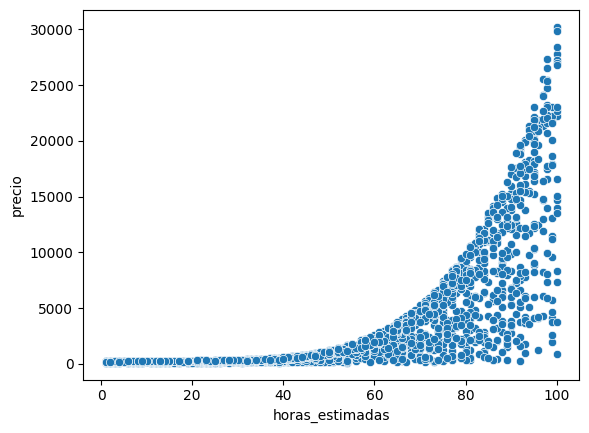

In [23]:
import seaborn as sns

sns.scatterplot(data=data, x='horas_estimadas', y='precio')

<Axes: xlabel='horas_estimadas', ylabel='precio'>

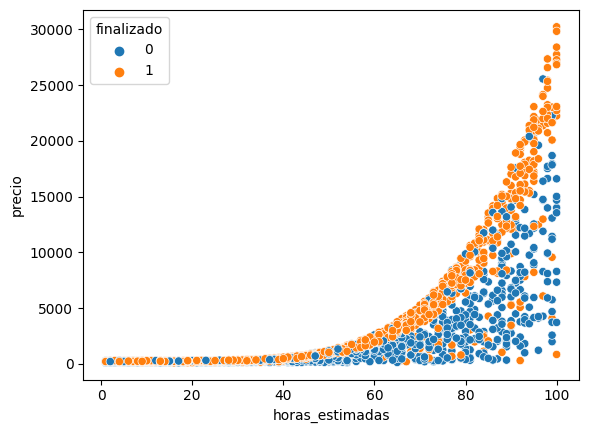

In [24]:
sns.scatterplot(data=data, x='horas_estimadas', y='precio', hue='finalizado')


In [25]:
import numpy as np
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
model = LinearSVC()
model.fit(x_train,y_train)
predicciones = model.predict(x_test)
tasa_acierto = accuracy_score(y_test, predicciones)
print(f'La tasa de aciertos fue del {round(tasa_acierto*100,2)}%')

La tasa de aciertos fue del 49.26%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [26]:
print(f'Entrenamos con {len(y_train)} y probamos con {len(y_test)}')
base_predicciones = np.ones(540)
tasa_acierto = accuracy_score(y_test, base_predicciones)
print(f'La tasa de aciertos fue del {round(tasa_acierto*100,2)}%')

Entrenamos con 1617 y probamos con 540
La tasa de aciertos fue del 52.59%


In [27]:
x_min = x_test.horas_estimadas.min()
x_max = x_test.horas_estimadas.max()
y_min = y_test.min()
y_max = y_test.max()

pixels = 100

eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [28]:
x_test


,horas_estimadas,precio
1883,58,1766
405,18,131
1733,19,267
1242,34,394
1892,53,1125
...,...,...
490,7,103
1612,46,896
449,49,550
541,3,102


In [29]:
xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
puntos

array([[ 1.  ,  0.  ],
       [ 1.99,  0.  ],
       [ 2.98,  0.  ],
       ...,
       [97.03,  0.99],
       [98.02,  0.99],
       [99.01,  0.99]])

In [30]:
Z = model.predict(puntos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

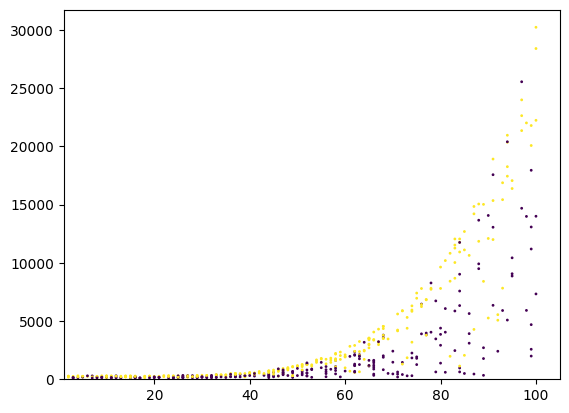

In [31]:
import matplotlib.pyplot as plt
plt.contourf(xx,yy,Z,alpha=0.3)
plt.scatter(x_test.horas_estimadas, x_test.precio, c=y_test, s=1)

#Dummy classifiers y arbol de decisiones

In [32]:
uri = 'https://gist.githubusercontent.com/ahcamachod/1595316a6b37bf39baac355b081d9c3b/raw/98bc94de744764cef0e67922ddfac2a226ad6a6f/car_prices.csv'
data = pd.read_csv(uri)
data

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


In [33]:
mapa = {
            "mileage_per_year" : "millas_por_ano",
            "model_year" :	"ano_del_modelo",
            "price"	: "precio",
            "sold" : "vendido"
        }
data.rename(columns=mapa, inplace=True)
data

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


In [34]:
cambio = {"yes":1, "no":0}
data.vendido = data.vendido.map(cambio)
data

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0
9996,9996,13246,2002,107424.63,1
9997,9997,13018,2014,93856.99,0
9998,9998,10464,2011,51250.57,1


In [35]:
from datetime import datetime

ano_actual = datetime.today().year

data["edad_del_modelo"] = ano_actual - data.ano_del_modelo
data

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido,edad_del_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9
...,...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0,17
9996,9996,13246,2002,107424.63,1,21
9997,9997,13018,2014,93856.99,0,9
9998,9998,10464,2011,51250.57,1,12


In [36]:
data["kms_por_ano"] = round(data["millas_por_ano"] * 1.60934, 3)
data

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido,edad_del_modelo,kms_por_ano
0,0,21801,2000,30941.02,1,23,35085.221
1,1,7843,1998,40557.96,1,25,12622.054
2,2,7109,2006,89627.50,0,17,11440.798
3,3,26823,2015,95276.14,0,8,43167.327
4,4,7935,2014,117384.68,1,9,12770.113
...,...,...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0,17,25060.642
9996,9996,13246,2002,107424.63,1,21,21317.318
9997,9997,13018,2014,93856.99,0,9,20950.388
9998,9998,10464,2011,51250.57,1,12,16840.134


In [37]:
data["kms_totales"] = data.kms_por_ano * data.edad_del_modelo
data

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido,edad_del_modelo,kms_por_ano,kms_totales
0,0,21801,2000,30941.02,1,23,35085.221,806960.083
1,1,7843,1998,40557.96,1,25,12622.054,315551.350
2,2,7109,2006,89627.50,0,17,11440.798,194493.566
3,3,26823,2015,95276.14,0,8,43167.327,345338.616
4,4,7935,2014,117384.68,1,9,12770.113,114931.017
...,...,...,...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0,17,25060.642,426030.914
9996,9996,13246,2002,107424.63,1,21,21317.318,447663.678
9997,9997,13018,2014,93856.99,0,9,20950.388,188553.492
9998,9998,10464,2011,51250.57,1,12,16840.134,202081.608


In [38]:
data = data.drop(columns=['Unnamed: 0','millas_por_ano','ano_del_modelo'], axis=1) 
data

,precio,vendido,edad_del_modelo,kms_por_ano,kms_totales
0,30941.02,1,23,35085.221,806960.083
1,40557.96,1,25,12622.054,315551.350
2,89627.50,0,17,11440.798,194493.566
3,95276.14,0,8,43167.327,345338.616
4,117384.68,1,9,12770.113,114931.017
...,...,...,...,...,...
9995,97112.86,0,17,25060.642,426030.914
9996,107424.63,1,21,21317.318,447663.678
9997,93856.99,0,9,20950.388,188553.492
9998,51250.57,1,12,16840.134,202081.608


In [51]:
x = data[["precio","edad_del_modelo","kms_por_ano"]]
y = data["vendido"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y)

In [52]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train,y_train)
exactitud = dummy.score(x_test,y_test)*100
print(f"La exactitud de most_frequence fue de {round(exactitud,2)}%.")

La exactitud de most_frequence fue de 58.0%.


In [53]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

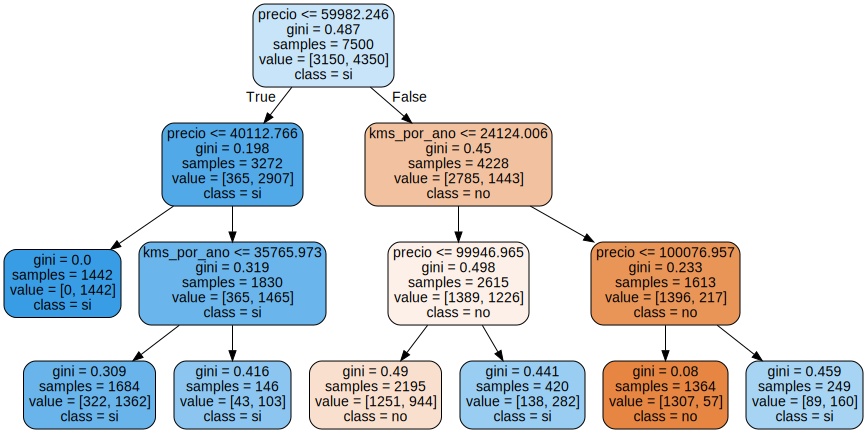

In [54]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names=features, filled=True, rounded=True, class_names=['no','si'])
grafico = graphviz.Source(dot_data)
grafico